In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from RecUnet_entangled import *
from train_RecUnet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

c:\Users\gaynuliy\Anaconda3\envs\home\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


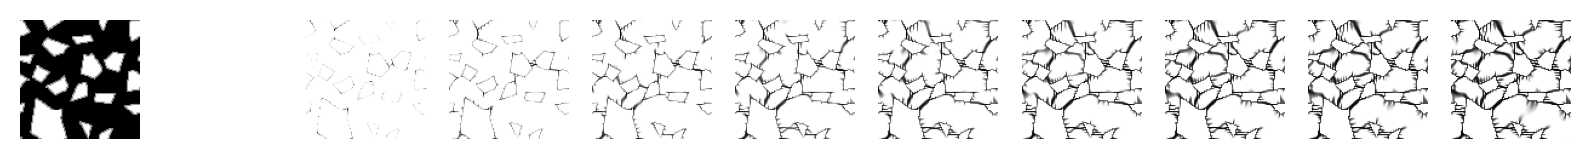

In [2]:
data = dataset_seq()
geometry, damage, imp_shrinkage, obs_shrinkage = data.__getitem__(1000)
loaders = get_loaders(data, 5)
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys')
    axs.flat[i].set_axis_off()

In [3]:
args = {'lr' : 0.00005, 'epochs' : 10, 'dev' : dev, 'name' : 'RecUnet_ent'}

In [4]:
unet = RecUNet()

In [5]:
unet = load_network(unet, args['name']+'_9', args)

In [6]:
losses_train, losses_val = train(unet, loaders, args)

c:\Users\gaynuliy\Anaconda3\envs\home\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0 batch: 0 mean train loss:  14991.0161319598
Epoch: 0 batch: 100 mean train loss:  13635.8282020397
Epoch: 0 batch: 200 mean train loss:  15501.8379653002
Epoch: 0 batch: 300 mean train loss:  13733.1531725230
Epoch: 0 batch: 400 mean train loss:  15243.3864992164
Epoch: 0 batch: 500 mean train loss:  17043.0475348935
Epoch: 0 batch: 600 mean train loss:  13169.1865450040
Epoch: 0 batch: 700 mean train loss:  14196.5314694360
Epoch: 0 batch: 800 mean train loss:  15137.6366177324
Epoch: 0 batch: 900 mean train loss:  14309.6724368918
Epoch: 0 batch: 1000 mean train loss:  15881.5535407251
Epoch: 0 batch: 1100 mean train loss:  15069.5180848298
Epoch: 0 batch: 1200 mean train loss:  13680.6107188541
Epoch: 0 batch: 1300 mean train loss:  14382.9760276771
Epoch: 0 batch: 1400 mean train loss:  14746.2394265612
Epoch: 0 batch: 1500 mean train loss:  14911.5593019767
Epoch: 0 batch: 1600 mean train loss:  14130.1949469338
Epoch: 0 batch: 1700 mean train loss:  14039.4576439867
Epoc

KeyboardInterrupt: 

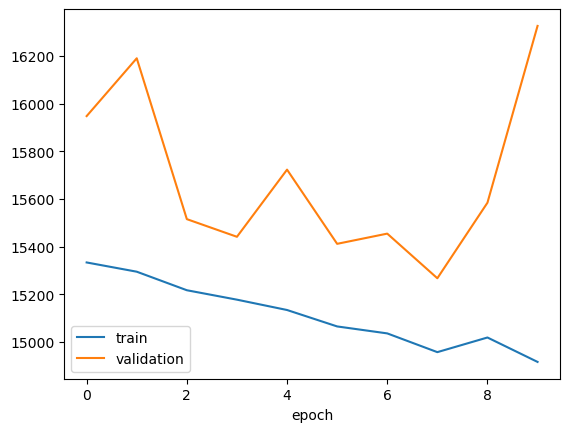

In [12]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])